In [ ]:
!pip install fastapi[all] langchain langchain-openai openai langchain-experimental

  Using cached fastapi-0.111.0-py3-none-any.whl (91 kB)
  Using cached langchain-0.2.6-py3-none-any.whl (975 kB)
  Using cached langchain_openai-0.1.14-py3-none-any.whl (45 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━

Listing Generation

In [ ]:
import os
os.environ["OPENAI_API_KEY"]="sk-proj-xyz"

In [ ]:
INSTRUCTION = "Generate fifteen realistic real estate listings from diverse neighborhoods. Include some urban areas,areas near oceans and include some areas in woods also."
SAMPLE_LISTING = \
"""
Here's a sample listing:

Neighborhood: Green Oaks
Price ($): 800,000
Bedrooms: 3
Bathrooms: 2
House Size (sqft): 2,000
Description: Welcome to this eco-friendly oasis nestled in the heart of Green Oaks. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Green Oaks gem.
Neighborhood Description: Green Oaks is a close-knit, environmentally-conscious community with access to organic grocery stores, community gardens, and bike paths. Take a stroll through the nearby Green Oaks Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze.
"""

In [ ]:
from langchain_openai import ChatOpenAI
from typing import List
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field, NonNegativeInt

class RealEstateListing(BaseModel):
    neighborhood: str = Field(description="Name of the Neighborhood")
    price: NonNegativeInt = Field(description="Price of the property in dollars")
    bedrooms: NonNegativeInt = Field(description= "Number of bedrooms")
    bathrooms: NonNegativeInt = Field(description="Number of bathrooms")
    house_size: NonNegativeInt = Field(description="Square footage of the property")
    description: str = Field(description="Description of the property")
    neighborhood_description: str = Field(description="Description of the neighborhood")

class ListingCollection(BaseModel):
    listings: List[RealEstateListing]=Field(description="List of real estate listings")

parser = PydanticOutputParser(pydantic_object=ListingCollection)

In [ ]:
prompt = PromptTemplate(
    template="{instruction}\n\n{sample_listing}\n{format_instruction}",
    input_variables=["instruction","sample_listing"],
    partial_variables={"format_instruction": parser.get_format_instructions()})

prompt_val = prompt.invoke({"instruction":INSTRUCTION,"sample_listing":SAMPLE_LISTING})
print(prompt_val)

text='Generate fifteen realistic real estate listings from diverse neighborhoods. Include some urban areas,areas near oceans and include some areas in woods also.\n\n\nHere\'s a sample listing:\n\nNeighborhood: Green Oaks\nPrice ($): 800,000\nBedrooms: 3\nBathrooms: 2\nHouse Size (sqft): 2,000\nDescription: Welcome to this eco-friendly oasis nestled in the heart of Green Oaks. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Green Oaks gem.\nNeighborhood Description: Green Oaks is a close-knit, environmentally-conscious community with access to organic grocery stores, community gardens, and bike paths. Take

In [ ]:
llm = ChatOpenAI(temperature=0.7,model="gpt-4o")
chain = prompt| llm| parser
response = chain.invoke({"instruction":INSTRUCTION,"sample_listing":SAMPLE_LISTING})
print(response)

listings=[RealEstateListing(neighborhood='Seaside Heights', price=1200000, bedrooms=4, bathrooms=3, house_size=3200, description='Experience the ultimate coastal living in this stunning 4-bedroom, 3-bathroom home located in Seaside Heights. With panoramic ocean views, a spacious deck, and direct beach access, this property is perfect for those who love the ocean. The open floor plan includes a gourmet kitchen with stainless steel appliances and a large island, ideal for entertaining.', neighborhood_description='Seaside Heights offers a vibrant coastal lifestyle with a bustling boardwalk, gourmet seafood restaurants, and plenty of water activities. Enjoy the local festivals and the serene sunsets over the ocean.'), RealEstateListing(neighborhood='Downtown Metropolis', price=950000, bedrooms=2, bathrooms=2, house_size=1500, description='Urban chic meets modern convenience in this 2-bedroom, 2-bathroom condo in the heart of Downtown Metropolis. Floor-to-ceiling windows provide breathtakin

In [ ]:
from fastapi.encoders import jsonable_encoder
import pandas as pd
df=pd.DataFrame(jsonable_encoder(response.listings))
df.head()

,neighborhood,price,bedrooms,bathrooms,house_size,description,neighborhood_description
0,Seaside Heights,1200000,4,3,3200,Experience the ultimate coastal living in this...,Seaside Heights offers a vibrant coastal lifes...
1,Downtown Metropolis,950000,2,2,1500,Urban chic meets modern convenience in this 2-...,Downtown Metropolis is the epicenter of cultur...
2,Whispering Pines,650000,3,2,2200,"Escape to tranquility in this 3-bedroom, 2-bat...",Whispering Pines is a secluded and peaceful co...
3,Sunset Cliffs,1850000,5,4,4000,"This luxurious 5-bedroom, 4-bathroom estate in...",Sunset Cliffs is an exclusive oceanfront commu...
4,Cedar Ridge,750000,4,3,2800,"Nestled in the woods of Cedar Ridge, this 4-be...",Cedar Ridge is a picturesque community surroun...


In [ ]:
df.to_csv("listings.csv")

Listing Image generation

In [ ]:
!pip install diffusers transformers accelerate scipy --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 40.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64

In [ ]:
df=pd.read_csv("listings.csv")

In [ ]:
from diffusers import DiffusionPipeline,AutoPipelineForText2Image
from diffusers.utils import load_image,make_image_grid
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Using device:cuda


/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16")
pipe.to(device)

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "A photo for real estate listing with the following property and neighborhood description:\n{}\n\n{}"
rand_gen = torch.manual_seed(9723947)
#have images for listings
images = []
for i, row in df.iterrows():
    custom_prompt = prompt.format(row['description'], row['neighborhood_description'])
    image = pipe(
        prompt=custom_prompt,
        num_inference_steps=3,
        guidance_scale=1.0,
        negative_prompt=[],
        generator=rand_gen
    ).images[0]
    images.append(image)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['island, ideal for entertaining. seaside heights offers a vibrant coastal lifestyle with a bustling boardwalk, gourmet seafood restaurants, and plenty of water activities. enjoy the local festivals and the serene sunsets over the ocean.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['island, ideal for entertaining. seaside heights offers a vibrant coastal lifestyle with a bustling boardwalk, gourmet seafood restaurants, and plenty of water activities. enjoy the local festivals and the serene sunsets over the ocean.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['downtown metropolis is the epicenter of culture and commerce, with top - rated restaurants, theaters, and shopping centers all within walking distance. public transportation is easily accessible, making commuting a breeze.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['downtown metropolis is the epicenter of culture and commerce, with top - rated restaurants, theaters, and shopping centers all within walking distance. public transportation is easily accessible, making commuting a breeze.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["whispering pines is a secluded and peaceful community, ideal for outdoor enthusiasts. enjoy hiking, bird - watching, and the natural beauty of the surrounding woods. local farmers'markets and small - town charm add to the appeal."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["whispering pines is a secluded and peaceful community, ideal for outdoor enthusiasts. enjoy hiking, bird - watching, and the natural beauty of the surrounding woods. local farmers'markets and small - town charm add to the appeal."]


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is an exclusive oceanfront community known for its breathtaking views and upscale homes. residents enjoy access to private beaches, scenic hiking trails, and top - rated schools.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is an exclusive oceanfront community known for its breathtaking views and upscale homes. residents enjoy access to private beaches, scenic hiking trails, and top - rated schools.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and landscaped yard. cedar ridge is a picturesque community surrounded by nature. it's ideal for those who enjoy hiking, fishing, and the great outdoors. the neighborhood has a strong sense of community with regular events and gatherings."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and landscaped yard. cedar ridge is a picturesque community surrounded by nature. it's ideal for those who enjoy hiking, fishing, and the great outdoors. the neighborhood has a strong sense of community with regular events and gatherings."]


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. harbor view is a sought - after waterfront community with access to boating, fishing, and waterfront dining. the neighborhood is known for its upscale homes and vibrant marina lifestyle.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. harbor view is a sought - after waterfront community with access to boating, fishing, and waterfront dining. the neighborhood is known for its upscale homes and vibrant marina lifestyle.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is a tranquil mountain community with access to hiking trails, skiing, and outdoor recreation. the neighborhood has a close - knit feel with regular community events and a friendly atmosphere.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is a tranquil mountain community with access to hiking trails, skiing, and outdoor recreation. the neighborhood has a close - knit feel with regular community events and a friendly atmosphere.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['luxurious master suite. lakeside retreat is a peaceful community centered around a beautiful lake. residents enjoy boating, fishing, and swimming, as well as access to scenic walking trails and parks.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['luxurious master suite. lakeside retreat is a peaceful community centered around a beautiful lake. residents enjoy boating, fishing, and swimming, as well as access to scenic walking trails and parks.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lounge. urban oasis is located in a vibrant urban neighborhood with easy access to restaurants, shops, and cultural attractions. public transportation is conveniently located, making it easy to explore the city.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lounge. urban oasis is located in a vibrant urban neighborhood with easy access to restaurants, shops, and cultural attractions. public transportation is conveniently located, making it easy to explore the city.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['coastal haven is a serene beachfront community with pristine beaches, scenic coastal trails, and a relaxed lifestyle. residents enjoy easy access to water sports, seaside dining, and beautiful sunsets.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['coastal haven is a serene beachfront community with pristine beaches, scenic coastal trails, and a relaxed lifestyle. residents enjoy easy access to water sports, seaside dining, and beautiful sunsets.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a quiet, wooded community perfect for nature lovers. enjoy hiking, bird - watching, and the natural beauty of the surrounding forest. the neighborhood has a friendly atmosphere with regular community events.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a quiet, wooded community perfect for nature lovers. enjoy hiking, bird - watching, and the natural beauty of the surrounding forest. the neighborhood has a friendly atmosphere with regular community events.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is a prestigious waterfront community with access to boating, fishing, and waterfront dining. the neighborhood is known for its upscale homes and scenic bay views.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is a prestigious waterfront community with access to boating, fishing, and waterfront dining. the neighborhood is known for its upscale homes and scenic bay views.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['community with stunning views and upscale homes. residents enjoy easy access to hiking trails, parks, and top - rated schools.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['community with stunning views and upscale homes. residents enjoy easy access to hiking trails, parks, and top - rated schools.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a beautiful river. residents enjoy boating, fishing, and scenic walking trails. the neighborhood has a friendly atmosphere with regular community events.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a beautiful river. residents enjoy boating, fishing, and scenic walking trails. the neighborhood has a friendly atmosphere with regular community events.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['brook is a vibrant community with easy access to parks, walking trails, and top - rated schools. the neighborhood has a friendly atmosphere with regular community events and activities.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['brook is a vibrant community with easy access to parks, walking trails, and top - rated schools. the neighborhood has a friendly atmosphere with regular community events and activities.']


  0%|          | 0/3 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ocean breeze is a serene beachfront community with pristine beaches, scenic coastal trails, and a relaxed lifestyle. residents enjoy easy access to water sports, seaside dining, and beautiful sunsets.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ocean breeze is a serene beachfront community with pristine beaches, scenic coastal trails, and a relaxed lifestyle. residents enjoy easy access to water sports, seaside dining, and beautiful sunsets.']


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# prompt = "A photo for real estate listing with the following property and neighborhood description:\n{}\n\n{}"
# rand_gen = torch.manual_seed(9723947)
# #have images for listings
# images = []
# custom_prompt = prompt.format(df.iloc[0]['description'], df.iloc[0]['neighborhood_description'])
# image = pipe(
#         prompt=custom_prompt,
#         num_inference_steps=3,
#         guidance_scale=1.0,
#         negative_prompt=[],
#         generator=rand_gen
#     ).images[0]
# images.append(image)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['island, ideal for entertaining. seaside heights offers a vibrant coastal lifestyle with a bustling boardwalk, gourmet seafood restaurants, and plenty of water activities. enjoy the local festivals and the serene sunsets over the ocean.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['island, ideal for entertaining. seaside heights offers a vibrant coastal lifestyle with a bustling boardwalk, gourmet seafood restaurants, and plenty of water activities. enjoy the local festivals and the serene sunsets over the ocean.']


  0%|          | 0/70 [00:00<?, ?it/s]

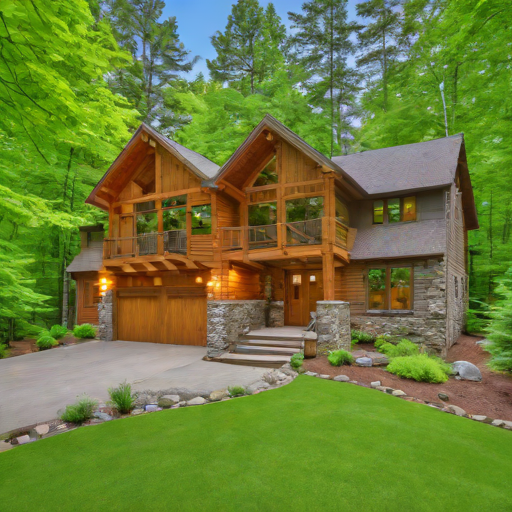

In [ ]:
images[4]

In [ ]:
import os
images_dir = "images"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
for i, image in enumerate(images):
    image.save(f"{images_dir}/image_{i}.png")

Vector DB Creation

In [ ]:
!pip install open-clip-torch chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 3

In [ ]:

images_dir = 'images'
text_template = \
"""
Description: {}
Neighborhood Description: {}
Price: {}
Bedrooms: {}
Bathrooms: {}
House Size (sqft): {}
"""

df = pd.read_csv('listings.csv')
image_paths = []
texts = []
ids = [{'id':i} for i in range(len(df.index))]

for i, row in df.iterrows():
    image_file = os.path.join(images_dir,"image_" + str(i) + ".png")
    image_paths.append(image_file)
    texts.append(text_template.format(row['description'],
                               row['neighborhood_description'],
                               row['price'],
                               row['bedrooms'],
                               row['bathrooms'],
                               row['house_size']))

In [ ]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings
from langchain.vectorstores import Chroma

db =Chroma(
    collection_name="real_estate_listings",
    embedding_function=OpenCLIPEmbeddings())

db.add_texts(texts,metadatas=ids)
db.add_images(image_paths,metadatas=ids)


['a142d127-d23b-4065-a634-a09726c38634',
 'dc76c1a5-e753-4d41-8aa2-2e865ec8566e',
 '74dc0134-ce43-495d-b3f8-fa51ce8b29d5',
 'b28246ae-acb2-4331-a4cb-2985c76838b2',
 'd4543ecc-5659-44d0-8d9d-d18a0706fbf1',
 'ec0be81b-4043-48ba-b19f-0ea0cb916b90',
 '7c12f89b-db76-4777-8c66-9e10f455fe7e',
 '12368aaa-7763-40a6-a8ae-7d26e5336bb4',
 '5880283f-5f6a-4896-8c08-c546d341517a',
 'e38d639c-a166-4b57-bfd3-f68c34d015bb',
 '0d8c4dd2-5fa5-4941-add4-aa3481079629',
 '90ae930b-1cfa-417b-af16-9d497469c7c2',
 '50c72362-c501-4f88-a419-58868a0fea8d',
 '57b4168d-7067-49b8-8442-5006542740bd',
 '51885e77-460a-4906-96fa-1fdb36e80515',
 'fa7a8328-2e49-4a9b-8e4a-57d3ad3f7957']

In [ ]:
QUESTIONS = [
                "What is your preferred size for the house in square feet or number of bedrooms?",
                "What are the three most important factors for you when choosing a property (e.g., location, price, school district)?",
                "Which amenities are essential for you (e.g., gym, pool, parking, pet-friendly)?",
                "What type of transportation options are you looking for (e.g., proximity to public transport, highway access, bike lanes)?",
                "How would you describe your ideal neighborhood (e.g., quiet, family-friendly, vibrant, close to nightlife)?"
            ]

In [ ]:
ANSWERS = [
                "A comfortable three-bedroom house with a spacious kitchen and a cozy living room.",
                "A quiet neighborhood, good local schools, and convenient shopping options.",
                "A backyard for gardening, a two-car garage, and a modern, energy-efficient heating system.",
                "Easy access to a reliable bus line, proximity to a major highway, and bike-friendly roads.",
                "A balance between suburban tranquility and access to urban amenities like restaurants and theaters."
          ]

In [ ]:
def get_top_listings(preferences: list[str],top_k:int=5)->list[int]:
    top_listings=[]
    combined_prefs="\n".join(preferences)
    results =db.similarity_search(combined_prefs,k=top_k)

    for result in results:
        if result.metadata['id'] not in top_listings:
          top_listings.append(result.metadata['id'])
        if len(top_listings)==top_k:
          break
    return top_listings


Description: This beautiful 3-bedroom, 2-bathroom home in Sunnybrook offers a perfect blend of modern living and natural beauty. The property features a spacious open floor plan, a gourmet kitchen, and a master suite with a private balcony. The backyard includes a large patio and a beautifully landscaped garden.
Neighborhood Description: Sunnybrook is a vibrant community with easy access to parks, walking trails, and top-rated schools. The neighborhood has a friendly atmosphere with regular community events and activities.
Price: 810000
Bedrooms: 3
Bathrooms: 2
House Size (sqft): 2100



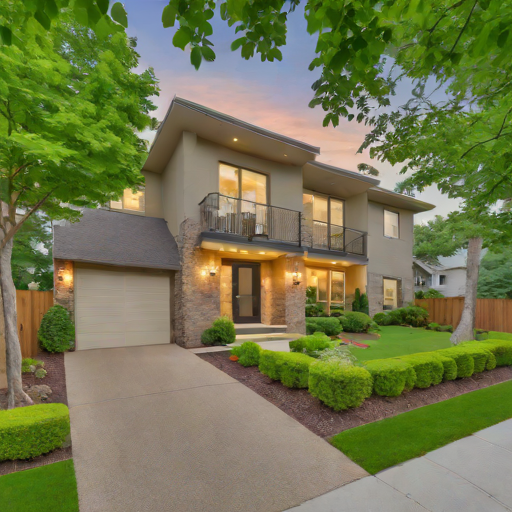

In [ ]:
result= get_top_listings(ANSWERS)
print(texts[result[0]])
images[result[0]]


Description: Urban chic meets modern convenience in this 2-bedroom, 2-bathroom condo in the heart of Downtown Metropolis. Floor-to-ceiling windows provide breathtaking city views, while the contemporary design features high-end finishes and smart home technology. Enjoy access to exclusive amenities, including a rooftop pool and fitness center.
Neighborhood Description: Downtown Metropolis is the epicenter of culture and commerce, with top-rated restaurants, theaters, and shopping centers all within walking distance. Public transportation is easily accessible, making commuting a breeze.
Price: 950000
Bedrooms: 2
Bathrooms: 2
House Size (sqft): 1500



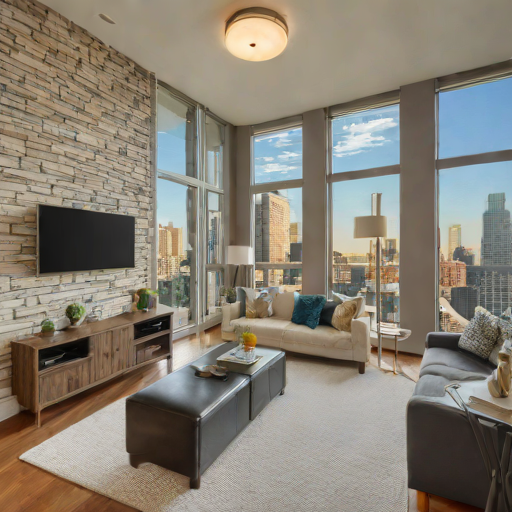

In [ ]:
ANSWERS = [
                "A cozy living room.",
                "Huge windows, Furnished with a nice grey sofa for stylish comfort with some lamp shade",
                "",
                "",
                ""
          ]
res = get_top_listings(ANSWERS)

# check top listing
print(texts[res[0]])
images[res[0]]

In [ ]:
INSTRUCTION = \
"""
Create a short statement for each listing to entice the buyer given their preferences. Try to paraphrase and highlight what the buyer wants.
"""

In [ ]:
class PersonalizedSummary(BaseModel):
    id :int =Field(description="Id for the listing")
    summary: str = Field(description="Summary of the listing")
class SummaryCollection(BaseModel):
    summaries: List[PersonalizedSummary]=Field(description="List of summaries")

parser= PydanticOutputParser(pydantic_object=SummaryCollection)
llm = ChatOpenAI(temperature=0,model="gpt-4o")
prompt = PromptTemplate(
    template="{instruction}\n\nBuyer Preferences:{buyer_preferences}\nListing:{listings}\n{format_instruction}",
    input_variables=["instruction","buyer_preferences","listings"],
    partial_variables={"format_instruction": parser.get_format_instructions()})


In [ ]:
cached_summary={}
cached_description={}

def personalize_top_listings(preferences:list[str],top_k:int=5)->list:
    top_listings=get_top_listings(preferences,top_k)
    top_listings_description=[]
    for id in top_listings:
        top_listings_description.append(''.join(['ID:'+str(id),texts[id]]))
    chain = prompt|llm|parser
    results=chain.invoke({"instruction":INSTRUCTION,"buyer_preferences":"\n".join(preferences),"listings":top_listings_description})
    # print(results)
    output=[]
    for result in results.summaries:
      output.append((result.id,result.summary))
      cached_description[result.id]=texts[result.id]
      cached_summary[result.id]=result.summary
    return output



In [ ]:
ANSWERS = [
                "A cozy living room.",
                "Huge windows, Furnished with a nice grey sofa for stylish comfort with some lamp shade",
                "",
                "",
                ""
          ]
res = personalize_top_listings(ANSWERS)

# check top listing
print(res)

[(1, 'Experience urban chic in this 2-bedroom, 2-bathroom condo in Downtown Metropolis. The cozy living room features huge floor-to-ceiling windows that flood the space with natural light, and a stylish grey sofa for ultimate comfort. Enjoy breathtaking city views and high-end finishes, along with exclusive amenities like a rooftop pool and fitness center.'), (8, 'Discover tranquility in city living with this 3-bedroom, 2-bathroom condo in Urban Oasis. The open-concept living space boasts modern finishes and expansive floor-to-ceiling windows, perfect for a cozy living room setup with a chic grey sofa. Enjoy amenities such as a rooftop garden, fitness center, and community lounge.'), (14, 'Embrace modern living in this 3-bedroom, 2-bathroom home in Sunnybrook. The spacious open floor plan is ideal for a cozy living room with large windows and a stylish grey sofa. The property also features a gourmet kitchen, a master suite with a private balcony, and a beautifully landscaped garden.')]

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=b848b9fa102daa5fe3bc7c9028857836abcab7e10ab3430ce6b1139b73092520
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0


In [ ]:
import gradio as gr

# Auxiliary event handling methods
def get_select_index(evt: gr.SelectData):
    listing_id = int(evt.value['image']['orig_name'].split('.')[0].split('_')[1])
    print(listing_id, cached_summary,cached_description)
    return cached_summary[listing_id],cached_description[listing_id]

# Fetch personalized listings from user preference
def get_search_result(answer0, answer1, answer2, answer3, answer4):
    search_results = []
    for id, summary in personalize_top_listings([answer0, answer1, answer2, answer3, answer4]):
        search_results.append((image_paths[id], df.iloc[id]['neighborhood']))
    return search_results

def clear_gallery():
    return []

# Draw layout of the Graphical User Interface
with gr.Blocks() as demo:
    gr.Label("Highpoint Real Estate Agency")

    with gr.Row():
        with gr.Column():
            answers = []
            for i in range(len(QUESTIONS)):
                answers.append(gr.Textbox(label=QUESTIONS[i]))
            btn = gr.Button("Submit", scale=0)
        with gr.Column():
            gallery = gr.Gallery(
                label="Recommended For You", show_label=True, elem_id="gallery",
                columns=[3], rows=[2], object_fit="contain", height="auto",
                allow_preview=True)
            personalized_desc = gr.Label(label="Personalized Description")
            complete_details = gr.Label(label="Property Details")


    # Set event handling
    btn.click(fn=get_search_result,
              inputs=[answers[i] for i in range(len(QUESTIONS))],
              outputs=gallery)

    gallery.select(get_select_index,
                   None,
                   outputs=[personalized_desc,complete_details])



In [ ]:
if __name__ == "__main__":
    demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://51564a80d926272bbd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


11 {11: 'Experience luxurious living in this elegant 4-bedroom, 3-bathroom home in Bayview. Enjoy stunning bay views, a spacious open floor plan, and a master suite with a spa-like bathroom. The backyard features a large patio and beautifully landscaped garden, perfect for quiet relaxation. Bayview offers upscale waterfront living with access to boating, fishing, and waterfront dining.', 8: 'This stylish 3-bedroom, 2-bathroom condo in Urban Oasis offers modern city living with a touch of tranquility. Enjoy open-concept living with floor-to-ceiling windows and city views. The building includes amenities like a rooftop garden, fitness center, and community lounge. Perfect for those who want vibrant urban living with convenient access to restaurants, shops, and cultural attractions.', 7: 'Indulge in lakeside luxury with this spacious 5-bedroom, 4-bathroom home in Lakeside Retreat. Features include a private dock, large deck with lake views, and a beautifully landscaped yard. Inside, enjoy